# Creation of the Neural Networks of an unknown Dataset in TensorFlow and analysis with TensorBoard

Hello everyone today we are going to create a Neural Network by using Tensorflow and we will analize it with TensorBoard. The interesting thing of this post is that I will deal a custom dataset that I dont know a priory which is neural network to use. So I will start writting the program from scratch.

![title](img/genshin.webp)

What I want to predict are the keys of a gamepad of a gameplay of one videogame

![](../../assets/images/posts/README/xbox.jpg)

<img src="img/xbox.jpg" alt="drawing" width="600"/>

# Installing Libaries


```
!pip install tensorboard
!pip install jupyter-tensorboard
```

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)

In [2]:
# We define the size of the pictures
WIDTH = 480
HEIGHT = 270

# Getting the data
First you should download the data for this project.
The data were obtained from the MMORPG Project here. I will take an small dataset , just for didactical purposes.

In [3]:
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')  

In [4]:
x_training_data.shape

(250, 270)

There are 250 pictures with resolutionn WIDTH = 480 and HEIGHT = 270 with 3 colors rgb

We define some helper functions

In [5]:
def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr


In [6]:
def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr

In [7]:
def showarray(a, fmt='jpeg'):
    a_n = np.uint8(np.clip(a, 0, 255))
    try :
        f = io.BytesIO()
        PIL.Image.fromarray(a_n).save(f, fmt)
        display(Image(data=f.getvalue()))
    except:
        #a = a[:, :, ::-1] # convert image from RGB (skimage) to BGR (opencv)
        # display image   
        plt.imshow(a)
        plt.show()  

In [8]:
def show_actions(X,Y,index_to_select):
    dato=[Y[index_to_select]]
    columna=['W', 'S', 'A', 'D', 'WA', 'WD', 'SA', 'SD','NOKEY','LT', 'RT', 'Lx', 'Ly', 'Rx', 'Ry', 'UP', 'DOWN', 'LEFT', 'RIGHT',
           'START', 'SELECT', 'L3', 'R3', 'LB', 'RB', 'A', 'B', 'X', 'Y']
    df_pred = pd.DataFrame(dato,columns=columna)
    df_pred_transposed = df_pred.T 
    print(df_pred_transposed) 
    showarray(X[index_to_select])

# Creation of train and test split

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)

Now, the training data and testing data are both labeled datasets. The training data is what we'll fit the neural network with, and the test data is what we're going to use to validate the results. The test data will be "out of sample," meaning the testing data will only be used to test the accuracy of the network, not to train it.

Next, we're going to create our data arrays.
 
Due to we cannot feed value of shape (64, 270, 480, 3) for Tensor input/X:0, which has shape (?, 480, 270, 3) we need to use reshape(-1,WIDTH,HEIGHT,3)

**For the train part**

In [10]:
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,WIDTH,HEIGHT,3)

#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]

**For the test part**

In [11]:
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)

## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

In [12]:
print( 'You have ' + str(len(X)) +  " pictures to train and " +str(len(test_x))+ " pictures to test" )

You have 200 pictures to train and 50 pictures to test


Le tus print some outpus that we want to predict:

        0
W       0
S       0
A       0
D       0
WA      0
WD      0
SA      0
SD      0
NOKEY   1
LT      0
RT      0
Lx      0
Ly      1
Rx      0
Ry      0
UP      0
DOWN    0
LEFT    0
RIGHT   0
START   0
SELECT  0
L3      0
R3      0
LB      0
RB      0
A       0
B       0
X       0
Y       0


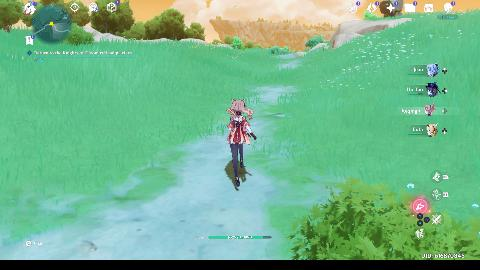

In [13]:
show_actions(X_image,Y,0)

# Neural Network creation

In ordering to create a Neural Network, we have to foccus mainly into two values that give us an estimation of the quality of our model, is the **accuracy** and the **loss**.

## Accuracy
Accuracy is more straightforward. It measures how well our model predicts by comparing the model predictions with the true values in terms of percentage.

## Loss
Loss is a value that represents the summation of errors in our model. It measures how well (or bad) our model is doing. If the errors are high, the loss will be high, which means that the model does not do a good job. Otherwise, the lower it is, the better our model works.

The validation loss is greater than the training loss. This usually indicates that the model is overfitting, and cannot generalize on new data.

<img src="img/error.svg" alt="drawing" width="600"/>


Let us try to find a Neural network with **High accuracy** and **Low Loss**, it is not easy task!.

Next, we're ready to define our neural network:

# Convolution Network

Let us star with something simple.

In [14]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d,avg_pool_2d, conv_3d, max_pool_3d, avg_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.merge_ops import merge

In [15]:
def conv2d(width, height, lr, output=29):
    convnet = input_data(shape=[None, WIDTH, HEIGHT, 3], name='input')
    convnet = conv_2d(convnet, 32, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = fully_connected(convnet, 1024, activation='relu')
    convnet = dropout(convnet, 0.8)

    convnet = fully_connected(convnet, 29, activation='softmax')
    convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
    model = tflearn.DNN(convnet, tensorboard_dir='log')
    return model

What we have here is a nice, 29 layered convolutional neural network, with a fully connected layer, and then the output layer.



In [16]:
LR = 1e-3
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'conv2d') 
MODEL_NAME

'mmorpg-0.001-conv2d.model'

In [17]:
model = conv2d(WIDTH, HEIGHT,  LR, output=29)

Possible Issues if you get RESOURCE_EXHAUSTED.
There are multiple things you can do:

- Decrease batch size
- Decrase model input size
- Decrease other model properties such as filter size
- Get better hardware

You can use numba library to release all the gpu memory

```
pip install numba 
from numba import cuda 
device = cuda.get_current_device()
device.reset()
```

In [18]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
          show_metric=True, batch_size=64, snapshot_step=200,
          snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 15  | total loss: 45.78939 | time: 0.667s
| Adam | epoch: 005 | loss: 45.78939 - acc: 0.0000 -- iter: 180/180


By analizing this network is overfitting, te loss is huge! so we need create a good network

# Alexnet Network

In [14]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

In [16]:
LR = 1e-3
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alex0') 
MODEL_NAME

'mmorpg-0.001-alex0.model'

In [17]:
def alexnet(width, height, lr, output=29):
    # Building 'AlexNet'
    network = input_data(shape=[None, width, height, 3])
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 29, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=0.001)

    # Training
    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [18]:
model = alexnet(WIDTH, HEIGHT, LR, output=29)

In [19]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
          show_metric=True, batch_size=64, snapshot_step=200,
          snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 15  | total loss: 1.90749 | time: 20.594s
| Momentum | epoch: 005 | loss: 1.90749 - acc: 0.5036 -- iter: 180/180


In [20]:
print('SAVING MODEL!')
model.save(MODEL_NAME)   

SAVING MODEL!


# Full code 1

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
import os
# We define the size of the pictures
WIDTH = 480
HEIGHT = 270

LR = 1e-3
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alexnet1') 

if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')  

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr

def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr
def alexnet(width, height, lr, output=29):
    # Building 'AlexNet'
    network = input_data(shape=[None, width, height, 3])
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 29, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=0.001)

    # Training
    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)

# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,WIDTH,HEIGHT,3)

#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]


# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)

## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]



model = alexnet(WIDTH, HEIGHT, LR, output=29)


model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
          show_metric=True, batch_size=64, snapshot_step=200,
          snapshot_epoch=False, run_id=MODEL_NAME)
print('SAVING MODEL!')
model.save(MODEL_NAME)   

Training Step: 15  | total loss: 1.95906 | time: 21.006s
| Momentum | epoch: 005 | loss: 1.95906 - acc: 0.5166 -- iter: 180/180
SAVING MODEL!


Let us build a more complete program with more data

# Full code 2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# We define the size of the pictures
WIDTH = 480
HEIGHT = 270
LR = 1e-3
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alexnet2') 
PREV_MODEL = ''
LOAD_MODEL = False
FILE_I_END=4
EPOCHS=3

#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')  

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr

def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr
def alexnet(width, height, lr, output=29):
    # Building 'AlexNet'
    network = input_data(shape=[None, width, height, 3])
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 29, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=0.001)

    # Training
    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

model = alexnet(WIDTH, HEIGHT, LR, output=29)

if LOAD_MODEL:
    model.load(PREV_MODEL)
    print('We have loaded a previous model!!!!')
    
# iterates through the training files
for e in range(EPOCHS):
    data_order = [i for i in range(0,FILE_I_END)]
    #shuffle(data_order)
    for count,i in enumerate(data_order):
        try:
            #processed image rgb color - no image filters
            file_name_x = 'data/dfx-{}.pkl'.format(i)
            file_name_y = 'data/dfy-{}.pkl'.format(i)           
            print(file_name_x)
            #We load the images of the gameplay
            x_training_data=pd.read_pickle(file_name_x)  
            #We load the inputs of the of the gameplay
            y_training_data=pd.read_pickle(file_name_y)  
            X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
            # Train Image part ( 4 Dimensional)
            X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
            X=X_image.reshape(-1,WIDTH,HEIGHT,3)

            #Train Input part ( 1 Dimensional )
            Y = [df_to_numpy_input(y_train,i) for i in y_train.index]


            # Test Image part ( 4 Dimensional)
            test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
            test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)

            ## Test Input part( 1 Dimensional )
            test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

                     
            model.fit( X, Y, n_epoch=1, 
                      validation_set=(test_x,test_y), 
                      snapshot_step=200, 
                      show_metric=True, 
                      run_id=MODEL_NAME)
            if count%4 == 0:
                print('SAVING MODEL!')
                model.save(MODEL_NAME)                  
        except Exception as e:
            print(str(e))

Training Step: 47  | total loss: 2.72657 | time: 20.687s
| Momentum | epoch: 012 | loss: 2.72657 - acc: 0.5013 -- iter: 192/200
Training Step: 48  | total loss: 2.24509 | time: 28.372s
| Momentum | epoch: 012 | loss: 2.24509 - acc: 0.5287 | val_loss: -2.46434 - val_acc: 1.0000 -- iter: 200/200
--


# Tensorboard

In [34]:
#!tensorboard --logdir log

In [ ]:
%load_ext tensorboard
%tensorboard --logdir log